# The Pandas Playin' Day

In [43]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.notebook_repr_html", False)
pd.set_option("display.max_rows",100)
pd.set_option("expand_frame_repr", True)
pd.set_option('max_colwidth',80)

tips = pd.read_csv("http://gagolewski.com/resources/data/tips.csv", comment="#")
iris = pd.read_csv("http://gagolewski.com/resources/data/iris.csv", comment="#")
flights = pd.read_csv("http://gagolewski.com/resources/data/flights.csv", comment="#")

weather = pd.read_csv(
  "http://www.gagolewski.com/resources/data/nycflights13_weather.csv.gz",  
  compression="gzip",
  comment="#"
)

In [44]:
weather.head()

  origin  year  month  day  hour   temp   dewp  humid  wind_dir  wind_speed  \
0    EWR  2013      1    1     0  37.04  21.92  53.97     230.0    10.35702   
1    EWR  2013      1    1     1  37.04  21.92  53.97     230.0    13.80936   
2    EWR  2013      1    1     2  37.94  21.92  52.09     230.0    12.65858   
3    EWR  2013      1    1     3  37.94  23.00  54.51     230.0    13.80936   
4    EWR  2013      1    1     4  37.94  24.08  57.04     240.0    14.96014   

   wind_gust  precip  pressure  visib            time_hour  
0  11.918651     0.0    1013.9   10.0  2013-01-01 01:00:00  
1  15.891535     0.0    1013.0   10.0  2013-01-01 02:00:00  
2  14.567241     0.0    1012.6   10.0  2013-01-01 03:00:00  
3  15.891535     0.0    1012.7   10.0  2013-01-01 04:00:00  
4  17.215830     0.0    1012.8   10.0  2013-01-01 05:00:00  

* Convert temperature to Celsius.
* Compute daily mean temperatures for the `JFK` airport.
If some hourly temperature measurement is missing,
replace it with the average from the same hour in the
preceding and the following day.
* Present the daily mean temperatures on a plot.
The x-axis labels should be human-readable and intuitive.
* Choose days with greater mean temperature than in the preceding day.
* Find 5 hottest days.

In [45]:
# John F. Kennedy International Airport (JFK)
# LaGuardia Airport (LGA)
# Newark International Airport (EWR)

In [46]:
weather["tempC"] = (weather["temp"]-32.0)/1.8

In [50]:
weather_JFK = weather.loc[weather.origin == "JFK",:].reset_index(drop=True)
weather_JFK.iloc[:25, [1,2,3,4,-2, -1]]

    year  month  day  hour            time_hour  tempC
0   2013      1    1     0  2013-01-01 01:00:00    3.3
1   2013      1    1     1  2013-01-01 02:00:00    3.3
2   2013      1    1     2  2013-01-01 03:00:00    3.9
3   2013      1    1     3  2013-01-01 04:00:00    3.9
4   2013      1    1     4  2013-01-01 05:00:00    3.9
5   2013      1    1     6  2013-01-01 07:00:00    3.9
6   2013      1    1     7  2013-01-01 08:00:00    3.9
7   2013      1    1     8  2013-01-01 09:00:00    4.4
8   2013      1    1     9  2013-01-01 10:00:00    4.4
9   2013      1    1    10  2013-01-01 11:00:00    3.9
10  2013      1    1    11  2013-01-01 12:00:00    3.3
11  2013      1    1    12  2013-01-01 13:00:00    3.9
12  2013      1    1    13  2013-01-01 14:00:00    4.4
13  2013      1    1    14  2013-01-01 15:00:00    4.4
14  2013      1    1    15  2013-01-01 16:00:00    5.0
15  2013      1    1    16  2013-01-01 17:00:00    5.0
16  2013      1    1    17  2013-01-01 18:00:00    4.4
17  2013  

In [52]:
weather_JFK["time_hour"] = pd.to_datetime(weather_JFK["time_hour"])

In [53]:
weather_JFK.head()

  origin  year  month  day  hour   temp   dewp  humid  wind_dir  wind_speed  \
0    JFK  2013      1    1     0  37.94  23.00  54.51     240.0    16.11092   
1    JFK  2013      1    1     1  37.94  24.08  57.04     250.0    17.26170   
2    JFK  2013      1    1     2  39.02  24.98  56.77     240.0    19.56326   
3    JFK  2013      1    1     3  39.02  26.06  59.37     240.0    18.41248   
4    JFK  2013      1    1     4  39.02  24.98  56.77     260.0    14.96014   

   wind_gust  precip  pressure  visib           time_hour  tempC  
0  18.540125     0.0    1014.4   10.0 2013-01-01 01:00:00    3.3  
1  19.864419     0.0    1013.5   10.0 2013-01-01 02:00:00    3.3  
2  22.513008     0.0    1013.0   10.0 2013-01-01 03:00:00    3.9  
3  21.188714     0.0    1013.2   10.0 2013-01-01 04:00:00    3.9  
4  17.215830     0.0    1013.2   10.0 2013-01-01 05:00:00    3.9  

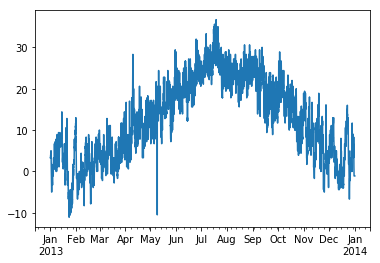

In [61]:
i = pd.date_range("2013-01-01 00:00:00", "2013-12-31 23:00:00", freq="1H")
weather_JFK.set_index("time_hour").loc[:,"tempC"].reindex(i).interpolate().fillna(method='bfill').plot()

In [78]:
i = pd.date_range("2013-01-01 00:00:00", "2013-12-31 23:00:00", freq="1H")
x = weather_JFK.set_index("time_hour").loc[:,"tempC"].reindex(i)
for j in range(2):
    imissing = np.where(x.isnull())[0]
    imissing = imissing[(imissing >= 24) & (imissing < len(x)-24)]
    x[imissing] = (x[imissing-24].values+x[imissing+24].values)/2

x[imissing]
x.tempC = my_fill_na(x.tempC)

2013-10-26 02:00:00   NaN
2013-10-27 02:00:00   NaN
Name: tempC, dtype: float64

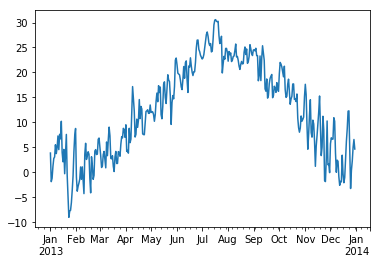

In [29]:
x = weather_JFK.loc[:,['year', 'month', 'day', 'tempC']].groupby(['year', 'month', 'day']).mean()
x = x.reset_index()
x.index = pd.to_datetime(x.loc[:,['year', 'month', 'day']])
x.tempC.plot()

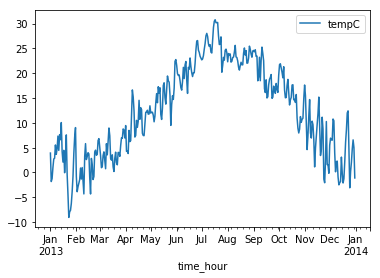

In [31]:
weather_JFK.set_index('time_hour').loc[:,['tempC']].\
    groupby(pd.Grouper(freq="D")).mean().plot()

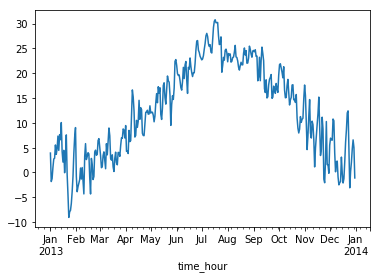

In [22]:
(
weather_JFK
    .set_index('time_hour')
    .loc[:,['year', 'month', 'day', 'tempC']]
    .groupby(pd.Grouper(freq="D"))
    .mean()
    .loc[:,"tempC"]
    .plot()
)

In [80]:
x = weather_JFK.set_index('time_hour').loc[:,['tempC']].\
    groupby(pd.Grouper(freq="D")).mean()
x.head()

               tempC
time_hour           
2013-01-01  3.913636
2013-01-02 -1.825000
2013-01-03 -1.237500
2013-01-04  1.012500
2013-01-05  2.720833

In [84]:
x[x.diff()>0].dropna().index

DatetimeIndex(['2013-01-03', '2013-01-04', '2013-01-05', '2013-01-06',
               '2013-01-07', '2013-01-09', '2013-01-10', '2013-01-12',
               '2013-01-14', '2013-01-17',
               ...
               '2013-12-18', '2013-12-19', '2013-12-20', '2013-12-21',
               '2013-12-22', '2013-12-23', '2013-12-26', '2013-12-27',
               '2013-12-28', '2013-12-29'],
              dtype='datetime64[ns]', name='time_hour', length=196, freq=None)

In [86]:
x.tempC.nlargest(5)

time_hour
2013-07-17    30.787500
2013-07-16    30.483333
2013-07-20    30.241667
2013-07-18    30.195833
2013-07-19    30.187500
Name: tempC, dtype: float64

In [87]:
weather = pd.read_csv(
  "http://www.gagolewski.com/resources/data/nycflights13_weather.csv.gz",  
  compression="gzip",
  comment="#"
)
flights = pd.read_csv(
  "http://www.gagolewski.com/resources/data/nycflights13_flights.csv.gz",  
  compression="gzip",
  comment="#"
)
airlines = pd.read_csv(
  "http://www.gagolewski.com/resources/data/nycflights13_airlines.csv.gz",  
  compression="gzip",
  comment="#"
)
planes = pd.read_csv(
  "http://www.gagolewski.com/resources/data/nycflights13_planes.csv.gz",  
  compression="gzip",
  comment="#"
)
airports = pd.read_csv(
  "http://www.gagolewski.com/resources/data/nycflights13_airports.csv.gz",  
  compression="gzip",
  comment="#"
)

In [88]:
# .info(), shape, ... describe(), value_counts, ...

In [89]:
flights.head()

   year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1     517.0             515        2.0     830.0   
1  2013      1    1     533.0             529        4.0     850.0   
2  2013      1    1     542.0             540        2.0     923.0   
3  2013      1    1     544.0             545       -1.0    1004.0   
4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819       11.0      UA    1545  N14228    EWR  IAH     227.0   
1             830       20.0      UA    1714  N24211    LGA  IAH     227.0   
2             850       33.0      AA    1141  N619AA    JFK  MIA     160.0   
3            1022      -18.0      B6     725  N804JB    JFK  BQN     183.0   
4             837      -25.0      DL     461  N668DN    LGA  ATL     116.0   

   distance  hour  minute            time_hour  
0      1400     5      15  2013-01-01 05:00:00  
1      1416 

In [90]:
import sqlite3

In [91]:
import os, os.path
os.getcwd()

'/home/gagolews/Teaching/DSR/batch13'

In [92]:
conn = sqlite3.connect("nycflights13.db")
# ..........
conn.close()
conn = None

In [93]:
conn = sqlite3.connect("nycflights13.db")

In [94]:
conn.execute("""
CREATE TABLE airlines(
    carrier CHAR(2) PRIMARY KEY,
    name VARCHAR(64)
)
""")
conn.commit()

In [98]:
a = list(airlines.to_records(index=False))
a[:3]

[('9E', 'Endeavor Air Inc.'),
 ('AA', 'American Airlines Inc.'),
 ('AS', 'Alaska Airlines Inc.')]

In [99]:
conn.executemany("""
    INSERT INTO airlines(carrier, name) VALUES (?, ?)
""", a)
conn.commit()

In [100]:
cur = conn.execute("""
SELECT * FROM airlines WHERE name LIKE '%AMERICA%'
""")

In [101]:
w = cur.fetchall()
w

[('AA', 'American Airlines Inc.'), ('VX', 'Virgin America')]

In [103]:
pd.DataFrame.from_records(w)

    0                       1
0  AA  American Airlines Inc.
1  VX          Virgin America

In [104]:
conn.close()

In [106]:
if os.path.isfile("nycflights13.db"):
    os.remove("nycflights13.db")
conn = sqlite3.connect("nycflights13.db")

airports.to_sql("airports", conn)
planes.to_sql("planes", conn)
flights.to_sql("flights", conn)
airlines.to_sql("airlines", conn)
weather.to_sql("weather", conn)

In [107]:
pd.read_sql_query("""
PRAGMA TABLE_INFO(airlines)
""", conn)

   cid     name     type  notnull dflt_value  pk
0    0    index  INTEGER        0       None   0
1    1  carrier     TEXT        0       None   0
2    2     name     TEXT        0       None   0

1. `SELECT DISTINCT engine FROM planes`
2. `SELECT DISTINCT type, engine FROM planes`
3. `SELECT COUNT(*), engine FROM planes GROUP BY engine`
4. `SELECT COUNT(*), engine, type FROM planes GROUP BY engine, type`

In [108]:
pd.read_sql_query("SELECT DISTINCT engine FROM planes", conn)

          engine
0      Turbo-fan
1      Turbo-jet
2  Reciprocating
3        4 Cycle
4    Turbo-shaft
5     Turbo-prop

In [113]:
pd.DataFrame(planes.engine.drop_duplicates().reset_index(drop=True))

          engine
0      Turbo-fan
1      Turbo-jet
2  Reciprocating
3        4 Cycle
4    Turbo-shaft
5     Turbo-prop

In [116]:
pd.DataFrame(planes.engine.unique(), columns=['engine'])

          engine
0      Turbo-fan
1      Turbo-jet
2  Reciprocating
3        4 Cycle
4    Turbo-shaft
5     Turbo-prop

In [120]:
planes.loc[:,["engine"]].drop_duplicates().reset_index(drop=True)

          engine
0      Turbo-fan
1      Turbo-jet
2  Reciprocating
3        4 Cycle
4    Turbo-shaft
5     Turbo-prop

In [121]:
planes.loc[:,["engine", "type"]].drop_duplicates().reset_index(drop=True)

          engine                      type
0      Turbo-fan   Fixed wing multi engine
1      Turbo-jet   Fixed wing multi engine
2  Reciprocating  Fixed wing single engine
3  Reciprocating   Fixed wing multi engine
4        4 Cycle  Fixed wing single engine
5    Turbo-shaft                Rotorcraft
6     Turbo-prop   Fixed wing multi engine

In [124]:
planes.groupby("engine").size().reset_index().rename(columns={0:"COUNT"})

          engine  COUNT
0        4 Cycle      2
1  Reciprocating     28
2      Turbo-fan   2750
3      Turbo-jet    535
4     Turbo-prop      2
5    Turbo-shaft      5

In [126]:
planes.groupby(["engine",'type']).size().reset_index().rename(columns={0:"COUNT"})

          engine                      type  COUNT
0        4 Cycle  Fixed wing single engine      2
1  Reciprocating   Fixed wing multi engine      5
2  Reciprocating  Fixed wing single engine     23
3      Turbo-fan   Fixed wing multi engine   2750
4      Turbo-jet   Fixed wing multi engine    535
5     Turbo-prop   Fixed wing multi engine      2
6    Turbo-shaft                Rotorcraft      5

In [129]:
pd.DataFrame(planes.engine.value_counts())

               engine
Turbo-fan        2750
Turbo-jet         535
Reciprocating      28
Turbo-shaft         5
Turbo-prop          2
4 Cycle             2

In [130]:
pd.crosstab(planes.engine, planes.type)

type           Fixed wing multi engine  Fixed wing single engine  Rotorcraft
engine                                                                      
4 Cycle                              0                         2           0
Reciprocating                        5                        23           0
Turbo-fan                         2750                         0           0
Turbo-jet                          535                         0           0
Turbo-prop                           2                         0           0
Turbo-shaft                          0                         0           5

In [131]:
pd.crosstab(planes.engine, planes.type).unstack() # and so on....

type                      engine       
Fixed wing multi engine   4 Cycle             0
                          Reciprocating       5
                          Turbo-fan        2750
                          Turbo-jet         535
                          Turbo-prop          2
                          Turbo-shaft         0
Fixed wing single engine  4 Cycle             2
                          Reciprocating      23
                          Turbo-fan           0
                          Turbo-jet           0
                          Turbo-prop          0
                          Turbo-shaft         0
Rotorcraft                4 Cycle             0
                          Reciprocating       0
                          Turbo-fan           0
                          Turbo-jet           0
                          Turbo-prop          0
                          Turbo-shaft         5
dtype: int64

5. `SELECT MIN(year), AVG(year), MAX(year), engine, manufacturer FROM planes GROUP BY engine, manufacturer`
6. `SELECT * FROM planes WHERE speed IS NOT NULL`
7. `SELECT tailnum FROM planes WHERE seats BETWEEN 150 AND 190 AND year >= 2012`
8. `SELECT * FROM planes WHERE manufacturer IN ("BOEING", "AIRBUS", "EMBRAER") AND seats>390`

In [135]:
x = planes.loc[:,['engine', 'manufacturer','year']].\
    groupby(['engine', 'manufacturer']).agg(({"year": [np.min, np.mean, np.max]})).\
    reset_index().dropna()
x.head()

          engine        manufacturer    year                     
                                        amin         mean    amax
0        4 Cycle              CESSNA  1975.0  1975.000000  1975.0
3  Reciprocating  AVIAT AIRCRAFT INC  2007.0  2007.000000  2007.0
5  Reciprocating              CESSNA  1959.0  1971.142857  1983.0
6  Reciprocating  CIRRUS DESIGN CORP  2007.0  2007.000000  2007.0
7  Reciprocating         DEHAVILLAND  1959.0  1959.000000  1959.0

In [140]:
np.min.__name__ = "min"

In [141]:
x = planes.loc[:,['engine', 'manufacturer','year']].\
    groupby(['engine', 'manufacturer']).agg(({"year": [np.min, np.mean, np.max]})).\
    reset_index().dropna()
x.head()

          engine        manufacturer    year                     
                                         min         mean    amax
0        4 Cycle              CESSNA  1975.0  1975.000000  1975.0
3  Reciprocating  AVIAT AIRCRAFT INC  2007.0  2007.000000  2007.0
5  Reciprocating              CESSNA  1959.0  1971.142857  1983.0
6  Reciprocating  CIRRUS DESIGN CORP  2007.0  2007.000000  2007.0
7  Reciprocating         DEHAVILLAND  1959.0  1959.000000  1959.0

In [143]:
planes.loc[:,['engine', 'manufacturer','year']].\
    groupby(['engine', 'manufacturer']).aggregate(["min", "mean", "max"]).head()

                                       year                
                                        min    mean     max
engine        manufacturer                                 
4 Cycle       CESSNA                 1975.0  1975.0  1975.0
              JOHN G HESS               NaN     NaN     NaN
Reciprocating AMERICAN AIRCRAFT INC     NaN     NaN     NaN
              AVIAT AIRCRAFT INC     2007.0  2007.0  2007.0
              BARKER JACK L             NaN     NaN     NaN

In [147]:
planes.loc[:,['engine', 'manufacturer','year']].\
    groupby(['engine', 'manufacturer']).describe().iloc[:,[1,3,7]].reset_index()

           engine                   manufacturer         year                
                                                         mean     min     max
0         4 Cycle                         CESSNA  1975.000000  1975.0  1975.0
1         4 Cycle                    JOHN G HESS          NaN     NaN     NaN
2   Reciprocating          AMERICAN AIRCRAFT INC          NaN     NaN     NaN
3   Reciprocating             AVIAT AIRCRAFT INC  2007.000000  2007.0  2007.0
4   Reciprocating                  BARKER JACK L          NaN     NaN     NaN
5   Reciprocating                         CESSNA  1971.142857  1959.0  1983.0
6   Reciprocating             CIRRUS DESIGN CORP  2007.000000  2007.0  2007.0
7   Reciprocating                    DEHAVILLAND  1959.000000  1959.0  1959.0
8   Reciprocating                        DOUGLAS  1956.000000  1956.0  1956.0
9   Reciprocating                 FRIEDEMANN JON  2007.000000  2007.0  2007.0
10  Reciprocating             HURLEY JAMES LARRY          NaN   

In [167]:
planes.loc[planes.speed.notnull(),:].shape #~speed.isnull()

(23, 9)

In [160]:
planes.query('speed != "NaN"').shape# :/

(23, 9)

In [161]:
np.nan == np.nan

False

In [163]:
planes.query('speed == speed').shape

(23, 9)

In [169]:
planes.query('150 <= seats <= 190 and year >= 2012').loc[:,["tailnum"]]

     tailnum
875   N361VA
2745  N849VA
2754  N851VA
2757  N852VA
2761  N853VA
2766  N854VA
2769  N855VA

In [177]:
planes.query('manufacturer in ["BOEING", "AIRBUS", "EMBRAER"] and seats > 390')
#planes.loc[planes.manufacturer.isin(["BOEING", "AIRBUS", "EMBRAER"]) & (planes.seats>390), :]

     tailnum    year                     type manufacturer    model  engines  \
439   N206UA  1999.0  Fixed wing multi engine       BOEING  777-222        2   
484   N228UA  2002.0  Fixed wing multi engine       BOEING  777-222        2   
577   N272AT     NaN  Fixed wing multi engine       BOEING  777-200        2   
1708  N57016  2000.0  Fixed wing multi engine       BOEING  777-224        2   
2109  N670US  1990.0  Fixed wing multi engine       BOEING  747-451        4   
2441  N77012  1999.0  Fixed wing multi engine       BOEING  777-224        2   
2485  N777UA  1995.0  Fixed wing multi engine       BOEING  777-222        2   
2494  N78003  1998.0  Fixed wing multi engine       BOEING  777-224        2   
2495  N78013  1999.0  Fixed wing multi engine       BOEING  777-224        2   
2519  N787UA  1997.0  Fixed wing multi engine       BOEING  777-222        2   
2804  N862DA  1999.0  Fixed wing multi engine       BOEING  777-232        2   
2806  N863DA  1999.0  Fixed wing multi e

9. `SELECT DISTINCT year, seats  FROM planes WHERE year >= 2012 ORDER BY year ASC, seats DESC`
10. `SELECT DISTINCT year, seats  FROM planes WHERE year >= 2012 ORDER BY seats DESC, year ASC`
11. `SELECT manufacturer, COUNT(*) FROM planes WHERE seats > 200 GROUP BY manufacturer`
12. `SELECT manufacturer, COUNT(*) FROM planes GROUP BY manufacturer HAVING COUNT(*) > 10`
13. `SELECT manufacturer, COUNT(*) FROM planes WHERE seats > 200 GROUP BY manufacturer HAVING COUNT(*) > 10`
14. `SELECT manufacturer, COUNT(*) AS howmany FROM planes GROUP BY manufacturer ORDER BY howmany DESC LIMIT 5`

In [181]:
x = planes.query("year >= 2012").loc[:,["year", "seats"]].drop_duplicates().reset_index(drop=True)
x.sort_values(["year", "seats"], ascending=[True, False]).reset_index(drop=True)

      year  seats
0   2012.0    379
1   2012.0    377
2   2012.0    260
3   2012.0    222
4   2012.0    200
5   2012.0    191
6   2012.0    182
7   2012.0    149
8   2012.0    140
9   2012.0     20
10  2012.0      5
11  2013.0    379
12  2013.0    377
13  2013.0    222
14  2013.0    200
15  2013.0    199
16  2013.0    191
17  2013.0    182
18  2013.0    140
19  2013.0     95
20  2013.0     20

In [182]:
x.sort_values(["seats", "year"], ascending=[False, True]).reset_index(drop=True)

      year  seats
0   2012.0    379
1   2013.0    379
2   2012.0    377
3   2013.0    377
4   2012.0    260
5   2012.0    222
6   2013.0    222
7   2012.0    200
8   2013.0    200
9   2013.0    199
10  2012.0    191
11  2013.0    191
12  2012.0    182
13  2013.0    182
14  2012.0    149
15  2012.0    140
16  2013.0    140
17  2013.0     95
18  2012.0     20
19  2013.0     20
20  2012.0      5

In [186]:
#3:
planes.query("seats>200").groupby("manufacturer").size().reset_index().\
    rename(columns={0: "COUNT"})

       manufacturer  COUNT
0            AIRBUS     66
1  AIRBUS INDUSTRIE      4
2            BOEING    225

In [187]:
#5:
planes.query("seats>200").groupby("manufacturer").size().reset_index().\
    rename(columns={0: "COUNT"}).query("COUNT>10").reset_index(drop=True)

  manufacturer  COUNT
0       AIRBUS     66
2       BOEING    225

In [188]:
#4:
planes.groupby("manufacturer").size().reset_index().\
    rename(columns={0: "COUNT"}).query("COUNT>10").reset_index(drop=True)

                    manufacturer  COUNT
0                         AIRBUS    336
1               AIRBUS INDUSTRIE    400
2                         BOEING   1630
3                 BOMBARDIER INC    368
4                        EMBRAER    299
5              MCDONNELL DOUGLAS    120
6  MCDONNELL DOUGLAS AIRCRAFT CO    103
7  MCDONNELL DOUGLAS CORPORATION     14

In [190]:
x = planes.groupby("manufacturer").size().reset_index().\
    rename(columns={0: "COUNT"})
x.loc[x.COUNT>10]

                     manufacturer  COUNT
1                          AIRBUS    336
2                AIRBUS INDUSTRIE    400
9                          BOEING   1630
10                 BOMBARDIER INC    368
17                        EMBRAER    299
27              MCDONNELL DOUGLAS    120
28  MCDONNELL DOUGLAS AIRCRAFT CO    103
29  MCDONNELL DOUGLAS CORPORATION     14

In [193]:
# SELECT manufacturer, COUNT(*) AS howmany 
#    FROM planes GROUP BY manufacturer ORDER BY howmany DESC LIMIT 5
planes.groupby("manufacturer").size().reset_index().rename(columns={0:"howmany"}).\
    sort_values("howmany", ascending=False).reset_index(drop=True).head(5)

       manufacturer  howmany
0            BOEING     1630
1  AIRBUS INDUSTRIE      400
2    BOMBARDIER INC      368
3            AIRBUS      336
4           EMBRAER      299

In [194]:
A = pd.DataFrame({
 "x": ["a0", "a1", "a2", "a3"],
 "y": ["b0", "b1", "b2", "b3"]
 })

B = pd.DataFrame({
 "x": ["a0", "a2", "a2", "a4"],
 "z": ["c0", "c1", "c2", "c3"]
 })


In [195]:
A

    x   y
0  a0  b0
1  a1  b1
2  a2  b2
3  a3  b3

In [196]:
B

    x   z
0  a0  c0
1  a2  c1
2  a2  c2
3  a4  c3

In [197]:
# See "normal forms" in https://en.wikipedia.org/wiki/Database_normalization

In [198]:
# INNER JOIN (NATURAL)
# SELECT A.*, B.* FROM A INNER JOIN B ON A.x = B.x
# SELECT A.*, B.* FROM A, B WHERE A.x=B.x
pd.merge(A, B, on='x', how='inner')

    x   y   z
0  a0  b0  c0
1  a2  b2  c1
2  a2  b2  c2

In [199]:
# LEFT JOIN
pd.merge(A, B, on='x', how='left')

    x   y    z
0  a0  b0   c0
1  a1  b1  NaN
2  a2  b2   c1
3  a2  b2   c2
4  a3  b3  NaN

In [200]:
# RIGHT JOIN
pd.merge(A, B, on='x', how='right')

    x    y   z
0  a0   b0  c0
1  a2   b2  c1
2  a2   b2  c2
3  a4  NaN  c3

In [202]:
# FULL OUTER JOIN
pd.merge(A, B, on='x', how='outer')

    x    y    z
0  a0   b0   c0
1  a1   b1  NaN
2  a2   b2   c1
3  a2   b2   c2
4  a3   b3  NaN
5  a4  NaN   c3

15. `SELECT * FROM flights LEFT JOIN planes ON flights.tailnum=planes.tailnum`

16.
  ```
  SELECT planes.*, airlines.* FROM
   (SELECT DISTINCT carrier, tailnum FROM flights) AS cartail
  INNER JOIN planes ON cartail.tailnum=planes.tailnum
  INNER JOIN airlines ON cartail.carrier=airlines.carrier
  ```
  
17.
  ```
  SELECT flights2.*, weather2.atemp, weather2.ahumid, weather2.apressure FROM
     (SELECT * FROM flights WHERE origin='EWR') AS flights2
  LEFT JOIN
     (SELECT year, month, day, AVG(temp) AS atemp,
       AVG(humid) AS ahumid, AVG(pressure) AS apressure
      FROM weather WHERE origin='EWR' GROUP BY year, month, day) AS weather2
  ON flights2.year=weather2.year
    AND flights2.month=weather2.month
    AND flights2.day=weather2.day
  ```

In [238]:
pd.merge(flights, planes, how="left", on="tailnum").shape

(336776, 27)

In [242]:
cartail = flights.loc[:,["carrier","tailnum"]].drop_duplicates().reset_index(drop=True)
pd.merge(
    pd.merge(cartail, planes, on="tailnum"),
    airlines, on="carrier").shape

(3339, 11)

In [251]:
flights2 = flights.query("origin=='EWR'")
weather2 = weather.query("origin=='EWR'").groupby(["year", "month", "day"]).\
    mean().loc[:,["temp", "humid", "pressure"]].reset_index().\
    rename(columns=dict(temp="atemp", humid="ahumid", pressure="apressure"))
pd.merge(flights2, weather2, on=["year", "month", "day"], how="left").shape

(120835, 22)

5. Given `fueleconomy::vehicles`, convert the values in
`cty` (city-) and `hwy` (highway-fuel economy -- given in mpg)
to l/100 km. Then add  new columns `z_cty` and `z_hwy`,
that give z-scores of `cty` and `hwy` relative to (grouped by) `class`.

In [230]:
vehicles = pd.read_csv("http://www.gagolewski.com/resources/data/fueleconomy_vehicles.csv.gz",
                      comment="#")

In [231]:
vehicles.head()

      id        make                model  year                        class  \
0  27550  AM General    DJ Po Vehicle 2WD  1984  Special Purpose Vehicle 2WD   
1  28426  AM General    DJ Po Vehicle 2WD  1984  Special Purpose Vehicle 2WD   
2  27549  AM General     FJ8c Post Office  1984  Special Purpose Vehicle 2WD   
3  28425  AM General     FJ8c Post Office  1984  Special Purpose Vehicle 2WD   
4   1032  AM General  Post Office DJ5 2WD  1985  Special Purpose Vehicle 2WD   

             trans             drive  cyl  displ     fuel  hwy  cty  
0  Automatic 3-spd     2-Wheel Drive  4.0    2.5  Regular   17   18  
1  Automatic 3-spd     2-Wheel Drive  4.0    2.5  Regular   17   18  
2  Automatic 3-spd     2-Wheel Drive  6.0    4.2  Regular   13   13  
3  Automatic 3-spd     2-Wheel Drive  6.0    4.2  Regular   13   13  
4  Automatic 3-spd  Rear-Wheel Drive  4.0    2.5  Regular   17   16  

In [234]:
import scipy.stats
vehicles["fhwy"] = 235.215/vehicles.hwy
vehicles["fcty"] = 235.215/vehicles.cty
x = pd.concat([vehicles,
      vehicles.loc[:,["fhwy","fcty","class"]].groupby("class").transform(scipy.stats.zscore).\
    rename(columns=dict(fhwy="zhwy", fcty="zcty"))
  ], axis=1)
x.head(), x.tail()

/opt/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:2248: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


(      id        make                model  year                        class  \
 0  27550  AM General    DJ Po Vehicle 2WD  1984  Special Purpose Vehicle 2WD   
 1  28426  AM General    DJ Po Vehicle 2WD  1984  Special Purpose Vehicle 2WD   
 2  27549  AM General     FJ8c Post Office  1984  Special Purpose Vehicle 2WD   
 3  28425  AM General     FJ8c Post Office  1984  Special Purpose Vehicle 2WD   
 4   1032  AM General  Post Office DJ5 2WD  1985  Special Purpose Vehicle 2WD   
 
              trans             drive  cyl  displ     fuel  hwy  cty  \
 0  Automatic 3-spd     2-Wheel Drive  4.0    2.5  Regular   17   18   
 1  Automatic 3-spd     2-Wheel Drive  4.0    2.5  Regular   17   18   
 2  Automatic 3-spd     2-Wheel Drive  6.0    4.2  Regular   13   13   
 3  Automatic 3-spd     2-Wheel Drive  6.0    4.2  Regular   13   13   
 4  Automatic 3-spd  Rear-Wheel Drive  4.0    2.5  Regular   17   16   
 
         fhwy       fcty      zhwy      zcty  
 0  13.836176  13.067500  0.548

5. Cleanse the `warsaw_weather` dataframe.

In [210]:
w = pd.read_csv("http://www.gagolewski.com/resources/data/warsaw_weather.csv",
                      comment="#")
w.head()

   Unnamed: 0                                                            0  \
0           0  Climate data for Warsaw (1981–2010) Extremes (1951–present)   
1           1                                                        Month   
2           2                                          Record high °C (°F)   
3           3                                         Average high °C (°F)   
4           4                                           Daily mean °C (°F)   

             1            2            3            4            5  \
0          NaN          NaN          NaN          NaN          NaN   
1          Jan          Feb          Mar          Apr          May   
2  13.8 (56.8)    17.2 (63)  22.9 (73.2)  30.5 (86.9)    32.8 (91)   
3   0.6 (33.1)   1.9 (35.4)   6.6 (43.9)  13.6 (56.5)  19.5 (67.1)   
4  −1.8 (28.8)  −0.6 (30.9)     2.8 (37)   8.7 (47.7)  14.2 (57.6)   

             6            7            8            9           10  \
0          NaN          NaN          NaN

In [ ]:
https://pandas.pydata.org/pandas-docs/stable/text.html